In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
data = pd.read_csv("winemag-data_first150k.csv")

In [ ]:
data.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [ ]:
data.drop(columns=["Unnamed: 0"], inplace=True)


1. Типы данных и создание новых переменных

  Определите и классифицируйте типы данных каждого столбца в наборе данных. Какие из них категориальные? Какие числовые?
Создайте новую переменную цена_за_балл, разделив цену на оценку, чтобы анализировать соотношение цены и качества вин.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [ ]:
(data.isna().sum() / len(data)) * 100

country         0.003313
description     0.000000
designation    30.302127
points          0.000000
price           9.073743
province        0.003313
region_1       16.603724
region_2       59.615053
variety         0.000000
winery          0.000000
dtype: float64

In [ ]:
data['region_1'].fillna(data['region_2'],inplace=True)

In [ ]:
data.drop(columns=["region_2"], inplace=True)

In [ ]:
(data.isna().sum() / len(data)) * 100

country         0.003313
description     0.000000
designation    30.302127
points          0.000000
price           9.073743
province        0.003313
region_1       16.603724
variety         0.000000
winery          0.000000
dtype: float64

In [ ]:
data['region_1'].value_counts()

region_1
Napa Valley                  6209
Columbia Valley (WA)         4975
Mendoza                      3586
Russian River Valley         3571
California                   3462
                             ... 
Alpilles                        1
Vin de Pays de Hauterive        1
Santa Barbara-Monterey          1
Sonoma County-Lake County       1
Coteaux du Tricastin            1
Name: count, Length: 1236, dtype: int64

In [ ]:
data_fill = data.copy()

In [ ]:
data_fill[data_fill.duplicated()]

,country,description,designation,points,price,province,region_1,variety,winery
300,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Syrah,Saviah
305,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,Chardonnay,Kumeu River
420,US,"Though just four years old, this wine seems ad...",NaN,87,36.0,Washington,Columbia Valley (WA),Cabernet Sauvignon,Dussek Family Cellars
422,US,Tawny in color and wafting of potpourri and fa...,NaN,87,20.0,New York,Finger Lakes,Cabernet Franc,Serenity
423,US,"The aromas on this wine are quite light, conve...",Weinbau,87,32.0,Washington,Wahluke Slope,Grenache,Sol Stone
...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,Champagne Blend,Gosset


In [ ]:
data_fill[(data_fill['country'] == 'US') & (data_fill['designation'] == 'The Funk Estate') & (data_fill['points'] == 94)]

,country,description,designation,points,price,province,region_1,variety,winery
29,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Syrah,Saviah
300,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Syrah,Saviah


In [ ]:
data_fill['region_1'].fillna("Napa Valley", inplace=True)

In [ ]:
data_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     150930 non-null  object 
 7   variety      150930 non-null  object 
 8   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 10.4+ MB


In [ ]:
data_fill.drop_duplicates(inplace=True)

In [ ]:
data_fill.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97851 entries, 0 to 149639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      97848 non-null  object 
 1   description  97851 non-null  object 
 2   designation  67955 non-null  object 
 3   points       97851 non-null  int64  
 4   price        89131 non-null  float64
 5   province     97848 non-null  object 
 6   region_1     97851 non-null  object 
 7   variety      97851 non-null  object 
 8   winery       97851 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.5+ MB


In [ ]:
data_fill = data_fill[data_fill['designation'].notna()]

In [ ]:
(data_fill.isna().sum() / len(data_fill)) * 100

country        0.004415
description    0.000000
designation    0.000000
points         0.000000
price          9.503348
province       0.004415
region_1       0.000000
variety        0.000000
winery         0.000000
dtype: float64

In [ ]:
data_fill.describe()

,points,price
count,67955.000000,61497.000000
mean,88.297373,36.166171
std,3.218268,36.397494
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,2013.000000


<Axes: >

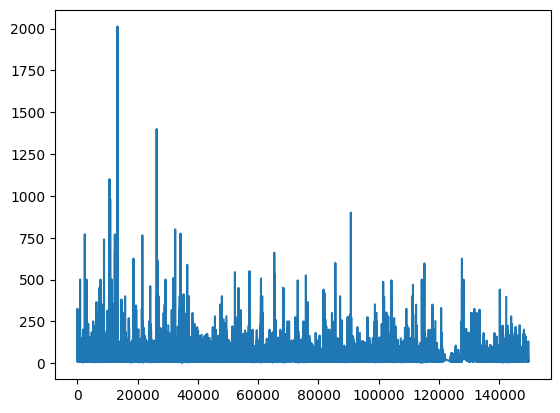

In [ ]:
data_fill['price'].plot()

In [ ]:
data_fill['price'].fillna(data_fill['price'].mean(), inplace=True)

In [ ]:
(data_fill.isna().sum() / len(data_fill)) * 100

country        0.004415
description    0.000000
designation    0.000000
points         0.000000
price          0.000000
province       0.004415
region_1       0.000000
variety        0.000000
winery         0.000000
dtype: float64

In [ ]:
data_fill['country'].value_counts()

country
US                        26232
Italy                     10537
France                     9770
Spain                      4317
Chile                      3154
Portugal                   3136
Argentina                  2431
Australia                  2147
Austria                    1677
Germany                    1438
New Zealand                 886
South Africa                788
Greece                      386
Israel                      324
Canada                      114
Hungary                     110
Romania                      93
Croatia                      47
Slovenia                     46
Uruguay                      42
Bulgaria                     41
Moldova                      39
Mexico                       39
Turkey                       32
Georgia                      27
Lebanon                      23
Cyprus                       12
Brazil                       11
England                       9
Serbia                        8
Ukraine                       5


In [ ]:
data_fill['country'].fillna('US',inplace=True)

In [ ]:
data_fill['province'].value_counts()

province
California                  18627
Washington                   4113
Tuscany                      3000
Northern Spain               2565
Bordeaux                     2111
                            ...  
Eastern Bays                    1
Marlborough & Hawkes Bay        1
Hemel en Aarde                  1
Neszmély                        1
South Styria                    1
Name: count, Length: 420, dtype: int64

In [ ]:
data_fill['province'].fillna('California',inplace=True)

In [ ]:
cleaned = data_fill.copy()

In [ ]:
cleaned["price_per_point"] = cleaned["price"] / cleaned["points"]

In [ ]:
cleaned.describe()

,points,price,price_per_point
count,67955.000000,67955.000000,67955.000000
mean,88.297373,36.166171,0.403998
std,3.218268,34.624811,0.369758
min,80.000000,4.000000,0.046512
25%,86.000000,18.000000,0.206897
50%,88.000000,30.000000,0.337079
75%,91.000000,42.000000,0.465116
max,100.000000,2013.000000,22.120879


2. Генеральная совокупность и выборка, частотные таблицы и распределения

Сформируйте частотную таблицу для переменной 'страна', чтобы увидеть количество отзывов по каждой стране.
Выберите случайную выборку из 100 строк и сравните среднюю цену с ценой по всему набору данных. Хорошо ли выборка представляет собой всю совокупность?


In [ ]:
cleaned['country'].value_counts()

country
US                        26235
Italy                     10537
France                     9770
Spain                      4317
Chile                      3154
Portugal                   3136
Argentina                  2431
Australia                  2147
Austria                    1677
Germany                    1438
New Zealand                 886
South Africa                788
Greece                      386
Israel                      324
Canada                      114
Hungary                     110
Romania                      93
Croatia                      47
Slovenia                     46
Uruguay                      42
Bulgaria                     41
Moldova                      39
Mexico                       39
Turkey                       32
Georgia                      27
Lebanon                      23
Cyprus                       12
Brazil                       11
England                       9
Serbia                        8
Ukraine                       5


<Axes: >

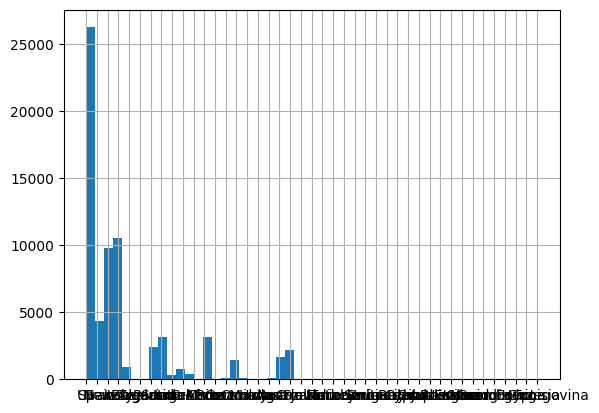

In [ ]:
cleaned['country'].hist(bins=50)

In [ ]:
cleaned['price'].mean()

36.16617070751418

In [ ]:
cleaned.sample(n=100)['price'].mean()

38.84661707075142

3. Описательные статистики

Рассчитайте описательные статистики для числовых переменных (среднее, медиана, мода, размах, дисперсия и стандартное отклонение).
Обсудите, какая мера центральной тенденции лучше всего описывает переменные оценки и цена и почему.


In [ ]:
cleaned.describe()

,points,price,price_per_point
count,67955.000000,67955.000000,67955.000000
mean,88.297373,36.166171,0.403998
std,3.218268,34.624811,0.369758
min,80.000000,4.000000,0.046512
25%,86.000000,18.000000,0.206897
50%,88.000000,30.000000,0.337079
75%,91.000000,42.000000,0.465116
max,100.000000,2013.000000,22.120879


In [ ]:
cleaned.var(numeric_only=True)

points               10.357252
price              1198.877519
price_per_point       0.136721
dtype: float64

In [ ]:
cleaned.mode(numeric_only=True)

,points,price,price_per_point
0,87,36.166171,0.410979


4. Z-оценка и выбросы

Рассчитайте Z-баллы для переменной цена, чтобы определить выбросы. Какой порог вы бы использовали и почему?
Как выбросы влияют на набор данных? Следует ли их удалять или оставить для анализа?


In [ ]:
cleaned.describe()

,points,price,price_per_point
count,67955.000000,67955.000000,67955.000000
mean,88.297373,36.166171,0.403998
std,3.218268,34.624811,0.369758
min,80.000000,4.000000,0.046512
25%,86.000000,18.000000,0.206897
50%,88.000000,30.000000,0.337079
75%,91.000000,42.000000,0.465116
max,100.000000,2013.000000,22.120879


In [ ]:
zscore = (cleaned["price"] - cleaned["price"].mean()) / cleaned["price"].std()

In [ ]:
zscore.describe()

count    6.795500e+04
mean     1.179446e-16
std      1.000000e+00
min     -9.289920e-01
25%     -5.246576e-01
50%     -1.780853e-01
75%      1.684870e-01
max      5.709299e+01
Name: price, dtype: float64

In [ ]:
zscore.min()

-0.9289919575579896

In [ ]:
(zscore <= 3).sum() / len(zscore)

0.987447575601501

array([[<Axes: title={'center': 'points'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'price_per_point'}>, <Axes: >]],
      dtype=object)

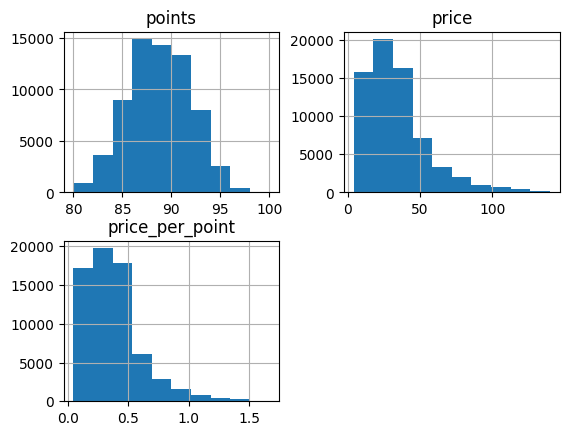

In [ ]:
cleaned[np.abs(zscore) <= 3].hist()

In [ ]:
cleaned = cleaned[np.abs(zscore) <= 3]

5. Корреляция

Вычислите матрицу корреляции для числовых переменных. Какие пары показывают наивысшую корреляцию?


<Axes: >

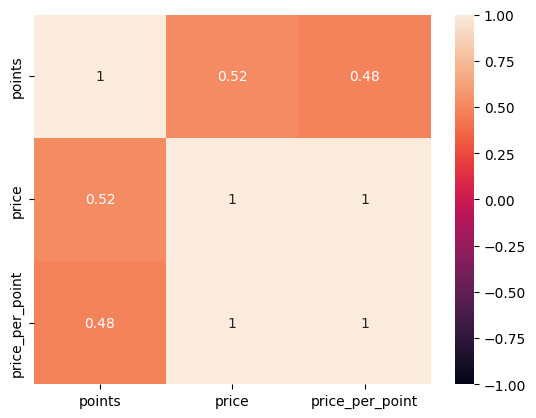

In [ ]:
sns.heatmap(cleaned.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)

<Axes: xlabel='price', ylabel='points'>

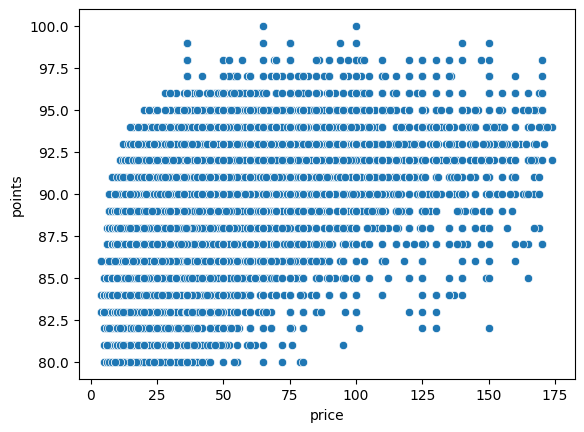

In [ ]:
sns.scatterplot(x=cleaned['price'],y=cleaned['points'])

<Axes: xlabel='price_per_point', ylabel='points'>

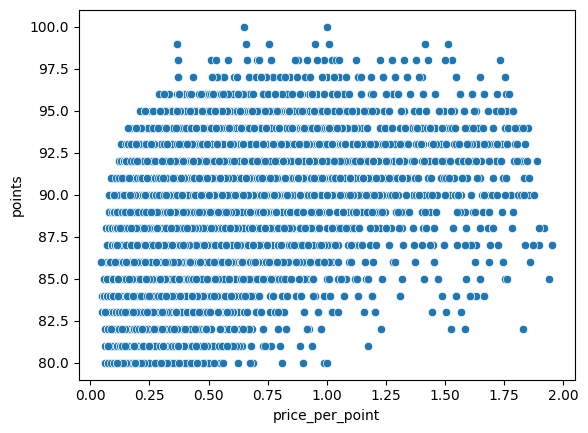

In [ ]:
sns.scatterplot(x=cleaned['price_per_point'],y=cleaned['points'])

<Axes: xlabel='price', ylabel='price_per_point'>

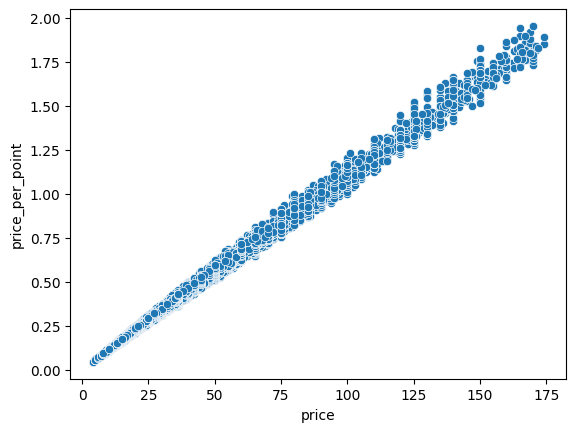

In [ ]:
sns.scatterplot(x=cleaned['price'],y=cleaned['price_per_point'])

6. Введение в визуализацию данных

Создайте гистограмму для переменной оценки и диаграмму размаха для переменной цена.

<Axes: >

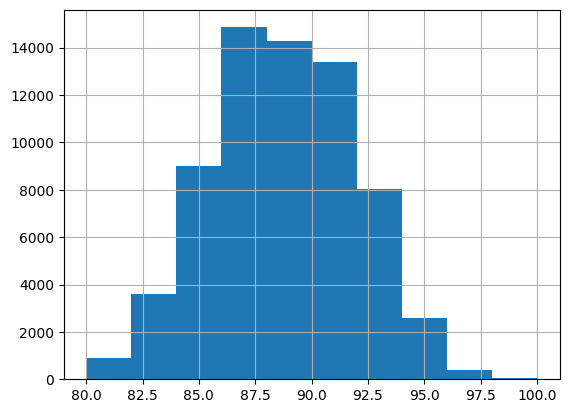

In [ ]:
cleaned['points'].hist(bins=10)

<Axes: ylabel='price'>

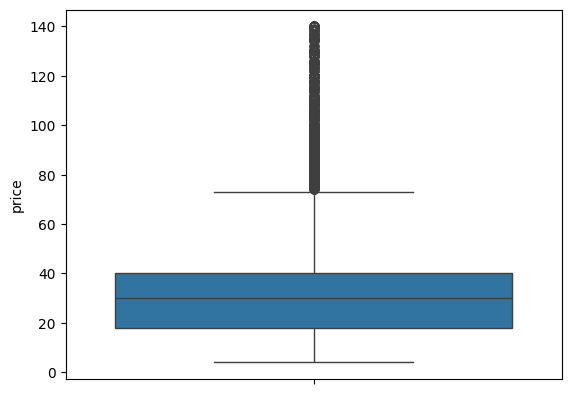

In [ ]:
sns.boxplot(cleaned["price"])

<Axes: ylabel='price'>

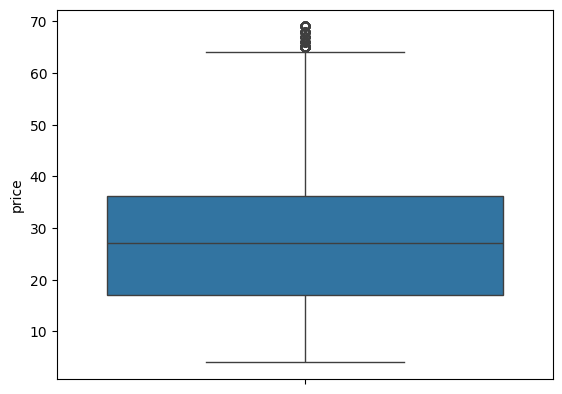

In [ ]:
sns.boxplot(cleaned[cleaned["price"] < 70]['price'])

<Axes: ylabel='price'>

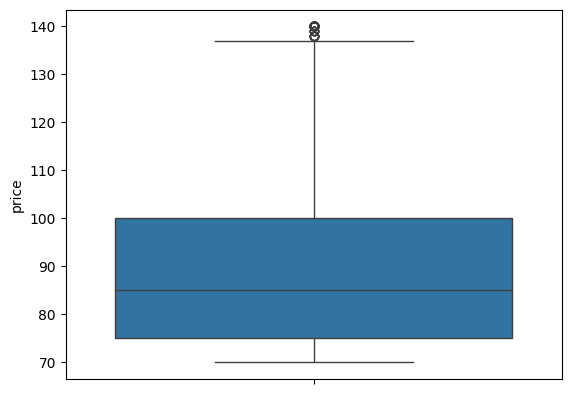

In [ ]:
sns.boxplot(cleaned[cleaned["price"] >= 70]['price'])

7. Продвинутая визуализация данных

Постройте диаграмму рассеяния, чтобы визуализировать взаимосвязь между ценой и оценками. Используйте цветовую кодировку, чтобы различать страны.


<Axes: xlabel='price', ylabel='points'>

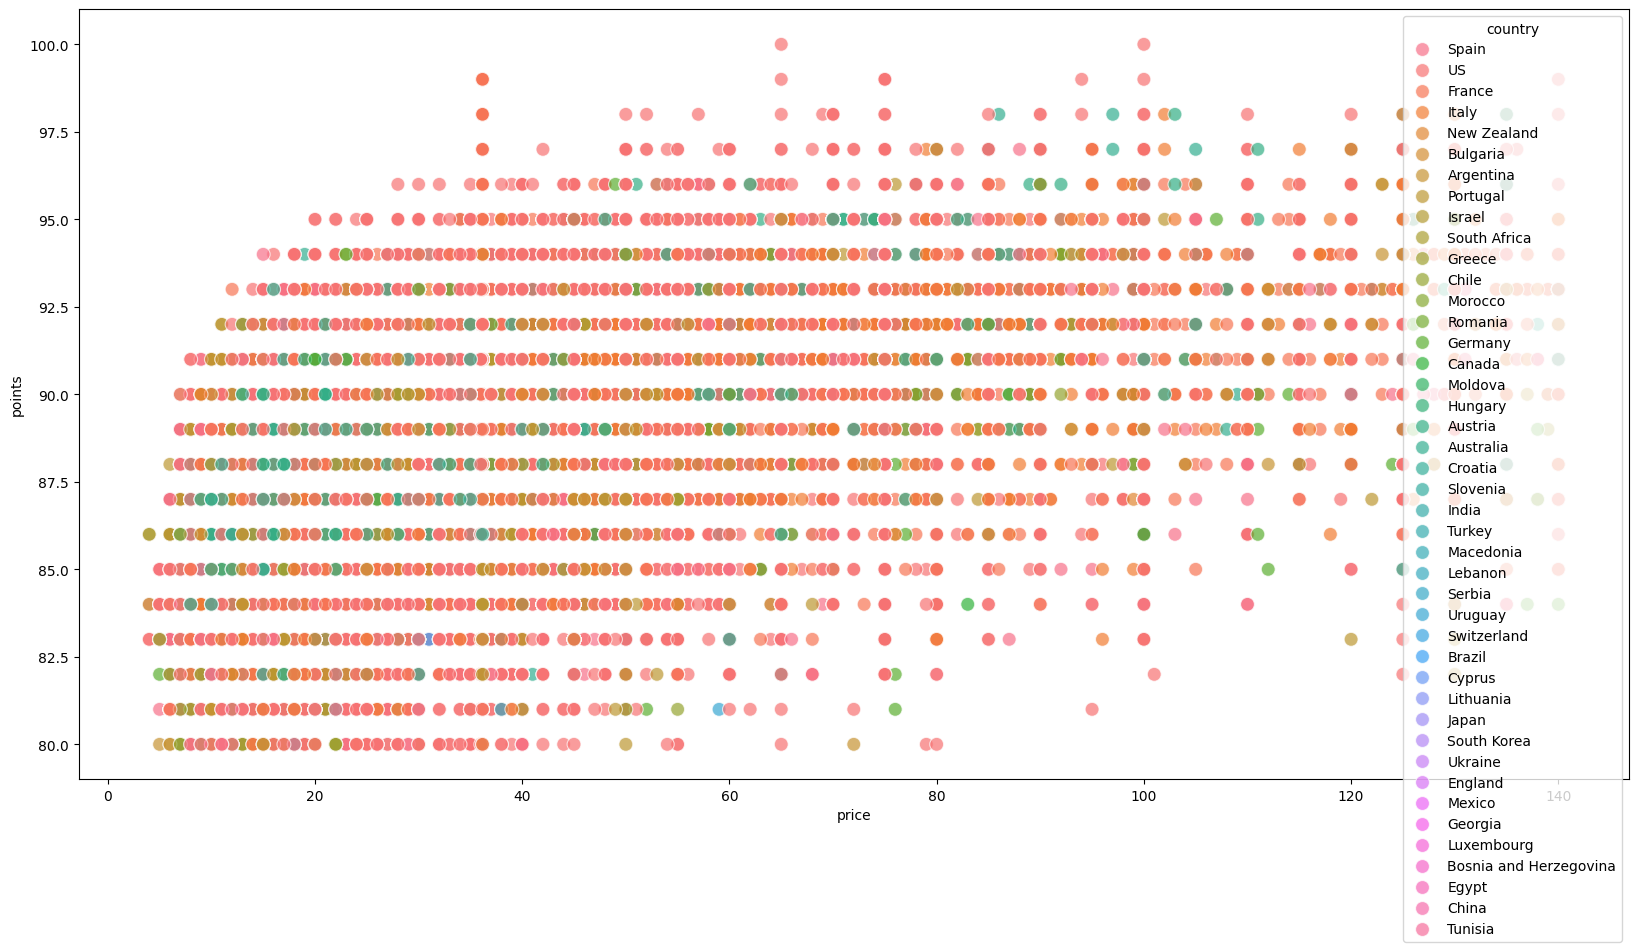

In [ ]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca()
sns.scatterplot(x=cleaned['price'], y=cleaned['points'], hue=cleaned['country'], alpha=0.7, s=100, ax=ax)

In [ ]:
country_counts = cleaned['country'].value_counts()

In [ ]:
country_counts

country
US                        26042
Italy                     10364
France                     9547
Spain                      4223
Chile                      3141
Portugal                   3106
Argentina                  2419
Australia                  2101
Austria                    1675
Germany                    1380
New Zealand                 886
South Africa                787
Greece                      386
Israel                      323
Canada                      113
Hungary                     105
Romania                      92
Croatia                      47
Slovenia                     46
Uruguay                      42
Bulgaria                     41
Moldova                      39
Mexico                       39
Turkey                       32
Georgia                      27
Lebanon                      23
Cyprus                       12
Brazil                       11
England                       9
Serbia                        8
Ukraine                       5


In [ ]:
min_count = 1000
main_countries = set(
    cleaned['country'].value_counts(sort=False).loc[lambda x: x >= min_count].index)
main_countries = cleaned.loc[cleaned['country'].isin(main_countries)]

In [ ]:
main_countries['country'].value_counts()

country
US           26042
Italy        10364
France        9547
Spain         4223
Chile         3141
Portugal      3106
Argentina     2419
Australia     2101
Austria       1675
Germany       1380
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='points'>

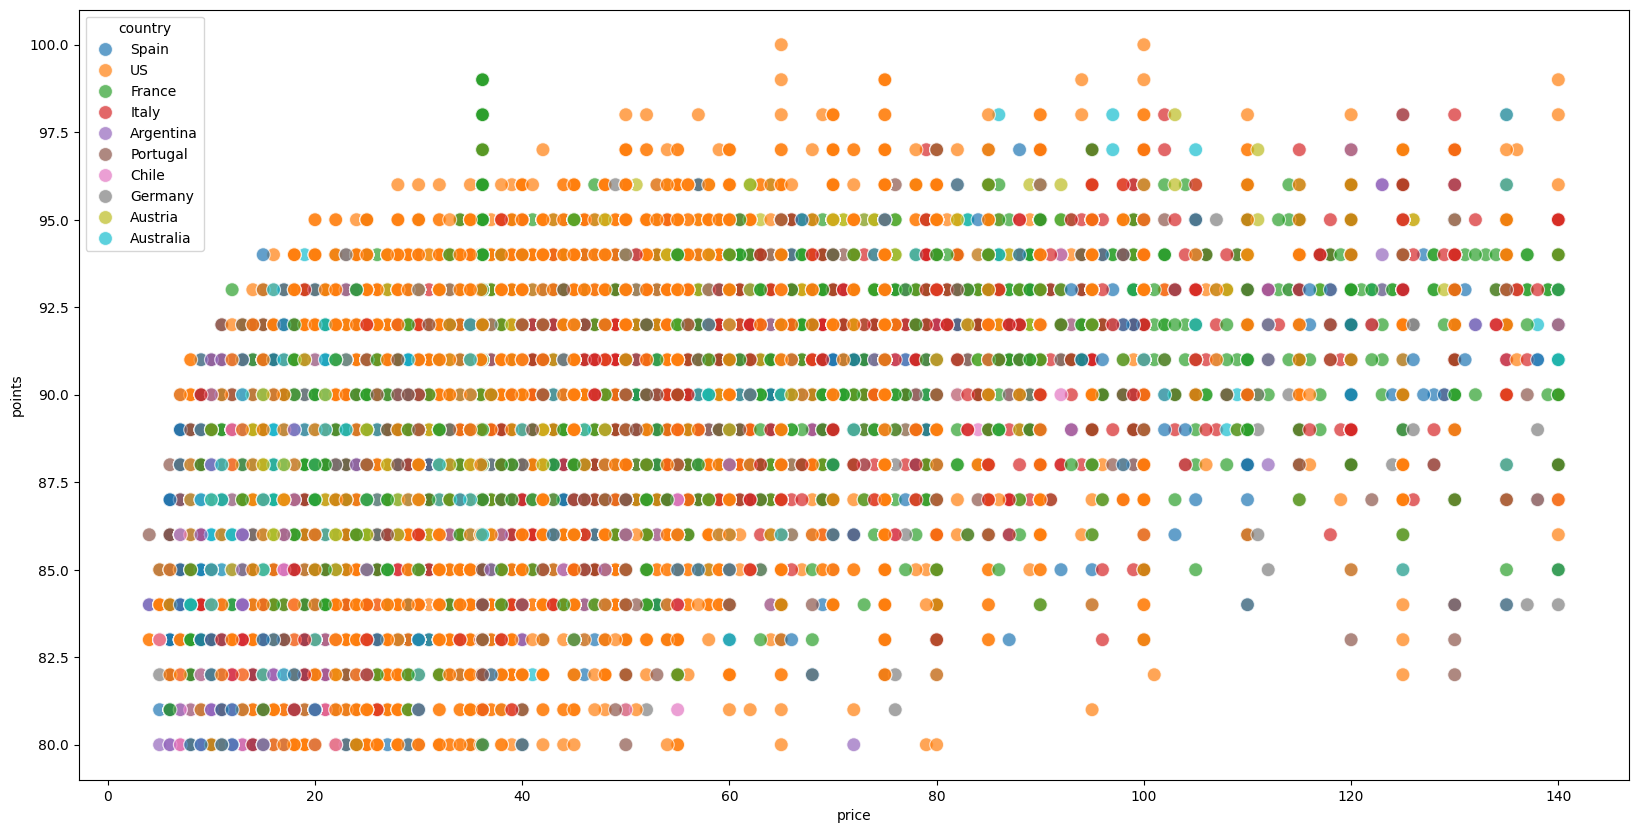

In [ ]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca()
sns.scatterplot(x=main_countries['price'], y=main_countries['points'], hue=main_countries['country'], alpha=0.7, s=100, ax=ax)

10. Линейная регрессия

Постройте модель линейной регрессии для прогнозирования цены на основе оценок. Каково значение R² и как оно интерпретируется?


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
X = cleaned[['points']].values
y = cleaned['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

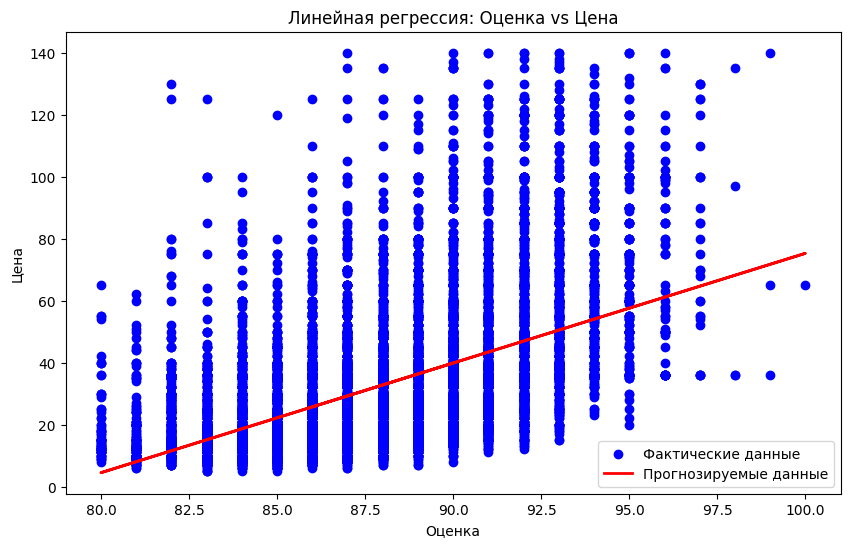

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Фактические данные')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Прогнозируемые данные')
plt.xlabel('Оценка')
plt.ylabel('Цена')
plt.title('Линейная регрессия: Оценка vs Цена')
plt.legend()
plt.show()

In [ ]:
r2_score(y_test, y_pred)

0.2728433734438199

11. Логистическая регрессия

Используя логистическую регрессию, предскажите, является ли вино из США на основе его оценок и цены. Обсудите точность модели.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
cleaned['is_usa'] = (cleaned['country'] == 'US').astype(int)

In [ ]:
cleaned['is_usa'].value_counts()

is_usa
0    41060
1    26042
Name: count, dtype: int64

In [ ]:
X = cleaned[['points', 'price']]
y = cleaned['is_usa']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.599210192981149

In [ ]:
pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,7756,455
1,4924,286


-----------------------------------------------------------------

8. Введение в тестирование гипотез, непараметрические критерии

Проведите тест Манна-Уитни для сравнения распределения оценок между винами из США и Франции. Что можно сделать вывод из результатов?


In [ ]:
us_points = data[data['country'] == 'US']['points']
france_points = data[data['country'] == 'France']['points']

In [ ]:
stat, p_value = stats.mannwhitneyu(us_points, france_points)

In [ ]:
stat

182305075.0

In [ ]:
p_value

6.061134560689758e-44

9. Параметрические критерии для тестирования гипотез

Выполните t-тест для сравнения средней цены вин из Калифорнии и Орегона. Существенно ли они различаются?


In [ ]:
california_prices = data[data['province'] == 'California']['price']
oregon_prices = data[data['province'] == 'Oregon']['price']

In [ ]:
california_prices.var()

853.250770036988

In [ ]:
oregon_prices.var()

351.5025146788459

In [ ]:
t_stat, p_value = stats.ttest_ind(california_prices, oregon_prices, equal_var=False)

In [ ]:
t_stat

0.04660511656930588

In [ ]:
p_value

0.9628298406289288